# Import Packages

In [99]:
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the Brownian Motion Function

In [100]:
def BrownianG(m,T,N,sigma,mu,w0,GB=False):
  """
  Arguments
  ---------

  m-Number of sample paths
  T-Total time
  sigma-Scale parameter
  N-number of steps
  nu-Drift parameter
  w0-Starting value

  Returns
  -------
  numpy array with shape with shape (m,N+1), where the first column gives the initial of each path

  """

  # time step
  dt = T/N
  # creating an array to store simulated values
  x = np.zeros((m,N+1))
  #initial values of x
  x[:,0] = w0
  x0 = x[:,0]
  # creating an array to store simulated values

  if not GB:
    # for each element of x0,generate a sample of n numbers from a normal distribution.
    r = norm.rvs(size=x0.shape + (N,),loc=mu*dt, scale=sigma*sqrt(dt))
    # This computes Brownian motion by taking cumulative sum of random samples
    np.cumsum(r,axis=-1,out=x[:,1:])
    # adding initial value
    x[:,1:] +=w0

  else:
    r = norm.rvs(size=x0.shape + (N,),loc=mu*dt, scale=sigma*sqrt(dt))
    # This computes Brownian motion by taking cumulative sum of random samples
    np.cumsum(r, axis=-1,out=x[:,1:])
    if w0!=0:
      x[:,1:]=w0*np.exp(x[:,1:])
    else:
      x[:,1:]=np.exp(x[:,1:])

  return x


# Define the Brownian Motion Plot Function

In [101]:
def Brownianplot(y,T):
  """
  Arguments
  ---------

  y-array with shape (m,N+1).Each row gives discritized verson of
  a sample path.There are m sample path.

  T-total time

  Returns
  --------
  Agraph of all sample paths

  """

  # Number of steps
  N=y.shape[1]
  # Lenth of time step
  dt=T/(N-1)

  t = np.linspace(0.0,N*dt,N)
  for k in range(y.shape[0]):
    plt.plot(t,y[k])
  plt.xlabel('Days',fontsize=15)
  plt.ylabel('Price',fontsize=15)
  plt.title("Simulated Sample Paths")
  # Show the grid lines as dark grey lines
  plt.grid(True)
  plt.show()

# Plot the Simulated Sample Paths

In [102]:
x = BrownianG(5000,20,498,0.023382083,0.001464345,58.2,GB=True)

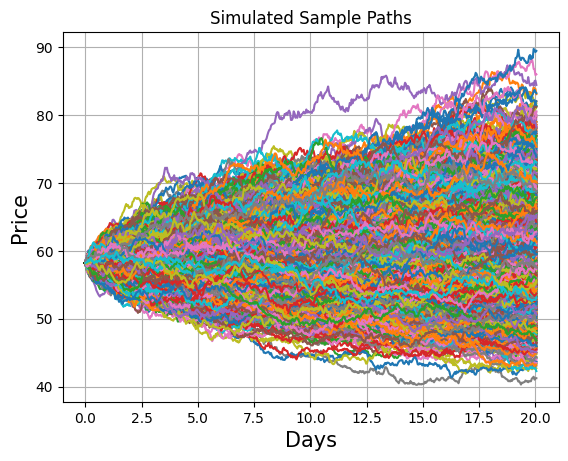

In [103]:
Brownianplot(x,20)

# Box Plot for the Possible Closing Price Values of the Last Day

In [104]:
dfGBM=pd.DataFrame(x.T)
dfGBM

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,...,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000
1,58.461183,57.961218,57.971269,58.548694,58.167493,58.440777,58.056753,58.341419,57.863117,57.810699,...,58.139689,58.286531,58.425639,58.119103,58.643116,58.445456,58.021186,58.188550,58.272036,58.302814
2,58.074369,58.120504,58.250973,58.288289,58.206808,58.134600,58.044847,59.072137,58.088050,58.101102,...,58.639246,58.527015,57.588321,58.305895,58.378947,58.737243,57.649035,58.830544,58.013618,58.299697
3,57.565419,58.470974,58.282249,58.249055,58.248574,58.208494,57.563625,58.653521,58.043065,58.205164,...,58.536685,58.571118,57.478779,58.246908,58.528940,58.889684,57.894276,58.515422,58.482866,58.652537
4,57.467211,58.519362,58.125168,58.138207,58.228750,58.141393,57.829951,58.664072,57.799371,58.590379,...,58.602510,58.817974,57.416671,57.975250,58.353959,58.979377,58.231482,58.637199,58.317931,58.438943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,48.338613,50.440327,70.637434,55.576740,59.520623,53.118658,66.812172,64.043071,59.164343,53.105720,...,59.855261,54.211283,55.967526,53.608331,65.078484,57.630790,56.957854,57.856032,54.781516,52.753565
495,48.319602,50.677692,69.899810,55.798044,59.628433,52.983986,66.497578,63.659576,59.251062,53.122200,...,59.930316,53.896316,56.251669,53.494550,65.190275,57.477657,56.835051,58.164217,55.050890,52.856115
496,48.381367,50.921709,69.593025,55.888730,60.040747,53.126256,66.922301,63.592536,59.594545,53.272029,...,59.591702,54.106466,56.191602,53.335901,64.820362,57.081887,57.226160,57.719245,55.237983,52.770865
497,48.592616,50.725629,70.148393,55.893927,60.010712,53.502016,66.038940,63.674305,59.738825,53.318341,...,59.616609,53.912272,56.022207,53.458860,64.870192,56.792033,57.443229,57.833482,55.339171,52.752774


In [105]:
endingValuesGBM=dfGBM.loc[498]
endingValuesGBM.describe()

count    5000.000000
mean       60.070611
std         6.246279
min        41.223894
25%        55.745405
50%        59.738384
75%        64.042536
max        89.466084
Name: 498, dtype: float64

Text(0.5, 1.0, 'closing price corresponding to the last day')

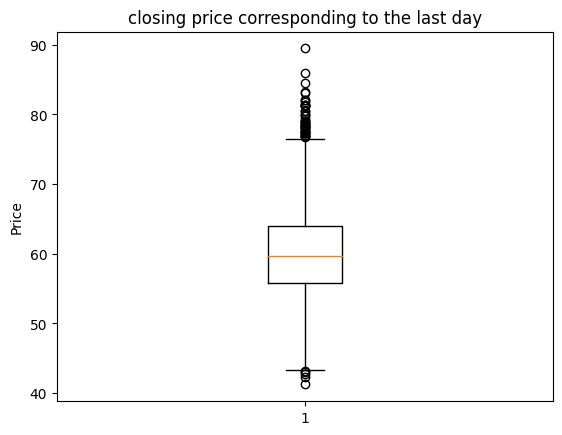

In [106]:
plt.boxplot(endingValuesGBM)
plt.ylabel("Price")
plt.title("closing price corresponding to the last day")

# The Probability of Closing Price Value of the Last Day in between 55 and 60

In [107]:
len(endingValuesGBM[(endingValuesGBM>55) & (endingValuesGBM<60)])/len(endingValuesGBM)

0.302

# The 95% Prediction Interval for the Closing Price Value of the Last Day

In [108]:
# 95% prediction interval for endingValues
np.percentile(endingValuesGBM,[2.5,97.5])

array([48.57990174, 73.15466058])